In [42]:
!git add .
    


In [43]:
!git commit -m"Changes"

[main ff4a65c] Changes
 1 file changed, 1053 insertions(+), 44 deletions(-)


In [44]:
!git push

To https://github.com/Apekshya3568/NLP.git
   e802b9d..ff4a65c  main -> main


Tokenize text using NLTK

In [ ]:
!pip install nltk

In [4]:
from nltk.tokenize import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()

text = "I am learning NLP and it is exciting!"
tokens = tokenizer.tokenize(text)

print(tokens)


['I', 'am', 'learning', 'NLP', 'and', 'it', 'is', 'exciting', '!']


spaCy Lemma, POS, Entities

In [6]:
!pip install spacy


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
!python -m spacy download en_core_web_sm


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
     - ------------------------------------- 0.5/12.8 MB 932.9 kB/s eta 0:00:14
     - ------------------------------------- 0.5/12.8 MB 932.9 kB/s eta 0:00:14
     -- ------------------------------------ 0.8/12.8 MB 987.4 kB/s eta 0:00:13
     --- ----------------------------------- 1.0/12.8 MB 882.6 kB/s eta 0:00:14
     --- ----------------------------------- 1.0/12.8 MB 882.6 kB/s eta 0:00:14
     --- ----------------------------------- 1.0/12.8 MB 882.6 kB/s eta 0:00:14
     --- ----------------------------------- 1.0/12.8 MB 882.6 kB/s eta 0:00:14
     --- ----------------------------------- 1.0/12.8 MB 882.6 kB/s eta 0:00:14
     --- ----------------------------------- 1.0/12.8 MB 882.6 kB/


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import spacy

nlp = spacy.load("en_core_web_sm")

doc = nlp("Apple is looking at buying a UK-based startup for $1 billion.")

for token in doc:
    print(token.text, token.lemma_, token.pos_)

print("\nNamed Entities:")
for ent in doc.ents:
    print(ent.text, ent.label_)


Apple Apple PROPN
is be AUX
looking look VERB
at at ADP
buying buy VERB
a a DET
UK UK PROPN
- - PUNCT
based base VERB
startup startup NOUN
for for ADP
$ $ SYM
1 1 NUM
billion billion NUM
. . PUNCT

Named Entities:
Apple ORG
UK GPE
$1 billion MONEY


In [6]:
import re
import spacy
nlp = spacy.load("en_core_web_sm")
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()                                 # lowercase
    text = re.sub(r'[^\w\s]', ' ', text)                 # remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()             # remove extra spaces
    
    doc = nlp(text)
    
    lemmas = [token.lemma_ for token in doc if token.lemma_ not in stop_words]
    cleaned = ' '.join(lemmas)
    return cleaned

sample = "I'm LOVING the new NLP course!!! It’s soooo helpful."
print(clean_text(sample))


I love new nlp course soooo helpful


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


MINI-PROJECT #1 (DO THIS AFTER LEARNING)
Build a Text Cleaning Pipeline
Final pipeline should take raw text → output cleaned text.

Full Steps:
1. Input Raw Text:User enters any messy text.
2. Process:Convert to lowercase,Remove URLs,Remove punctuation,Remove numbers,Remove special characters,Lemmatize,Remove stopwords
3. Output:Clean, normalized text ready for:classification,topic modeling,vectorization,embeddings

In [7]:
import re
import spacy
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nlp = spacy.load("en_core_web_sm")
stop_words = set(stopwords.words('english'))
def text_cleaning_pipeline(text):
    text = text.lower() # lowercase
    text = re.sub(r'http\S+|www\S+', '', text) #Remove URLs
    text = re.sub(r'[^\w\s]', ' ', text)#Remove punctuation
    text = re.sub(r'\d+', '', text) #Remove numbers
    text = re.sub(r'\s+', ' ', text).strip() #Remove extra spaces
    doc = nlp(text)

    #Lemmatize and remove stopwords
    cleaned_tokens = [
        token.lemma_ for token in doc 
        if token.lemma_ not in stop_words
    ]

    #Join back to string
    return " ".join(cleaned_tokens)


# Test your pipeline
raw = "NLP is AMAZING!!! Visit https://example.com for more info. Numbers: 12345."
print("Cleaned text →", text_cleaning_pipeline(raw))
            
                

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Cleaned text → nlp amazing visit info number


Extracting Emails

Pattern:[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}

In [8]:
import re

text = "Contact us at support@mail.com or admin123@gmail.com"
emails = re.findall(r"[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}", text)
print(emails)


['support@mail.com', 'admin123@gmail.com']


Extracting Phone Numbers

Nepali Format Examples:9841234567,+977-9841234567,01-4234567
Pattern (flexible):

(\+977[- ]?)?\d{2,4}[- ]?\d{6,7}

In [9]:
text = "9843447364 , +977-9876453213 , 01-4444898"
phones = re.findall(r"(?:\+977[- ]?)?\d{2,4}[- ]?\d{6,7}", text)
print(phones)

['9843447364', '+977-9876453213', '01-4444898']


Extracting Names (Simple)

Basic pattern: Word starting with capital letter

[A-Z][a-z]+

In [10]:
text = "Apekshya Lamichhane , Aakanchhya Lamichhane , Shiva "
names = re.findall(r"[A-Z][a-z]+",text)
print(names)

['Apekshya', 'Lamichhane', 'Aakanchhya', 'Lamichhane', 'Shiva']


In [11]:
pattern = r"^[\w\.-]+@[\w\.-]+\.\w+$"
bool(re.match(pattern, "hello@gmail.com"))


True

Validate Password
At least 8 characters
One uppercase
One lowercase
One digit

In [12]:
pattern = r"^(?=.*[a-z])(?=.*[A-Z])(?=.*\d).{8,}$"
bool(re.match(pattern, "peopLe@12"))


True

— Extract Dates
Support these formats:
2025-01-10
10/01/2025
Jan 10, 2025

(\d{4}-\d{2}-\d{2})|(\d{2}/\d{2}/\d{4})|([A-Za-z]{3,9} \d{1,2}, \d{4})

In [13]:
import re

text = "Events: 2025-01-10, 10/01/2025, Jan 10, 2025"
dates = re.findall(r"(\d{4}-\d{2}-\d{2})|(\d{2}/\d{2}/\d{4})|([A-Za-z]{3,9} \d{1,2}, \d{4})", text)
print(dates)


[('2025-01-10', '', ''), ('', '10/01/2025', ''), ('', '', 'Jan 10, 2025')]


Clean a Paragraph Using Regex

In [11]:
para = """
Hey!!! This   is a big paragraph with!!! 
numbers 12345, URLs https://google.com, 
hashtags #fun #NLP2025, and emails test@mail.com
"""

cleaned = re.sub(r"http\S+", "", para)       # remove URLs
cleaned = re.sub(r"\d+", "", cleaned)        # remove numbers
cleaned = re.sub(r"[^\w\s]", " ", cleaned)   # remove punctuation
cleaned = re.sub(r"\s+", " ", cleaned)       # fix spaces

print(cleaned.strip())


Hey This is a big paragraph with numbers URLs hashtags fun NLP and emails test mail com


Regex-based Log File Analyzer

This is your full project for Regex learning.

You will build a tool that:
Reads a log file
Extracts errors, warnings, timestamps, IP addresses
Shows summary statistics

In [12]:
import re

def analyze_log(file_path):
    with open(file_path, "r") as f:
        data = f.read()
    
    timestamps = re.findall(r"\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}", data)
    ips = re.findall(r"\d+\.\d+\.\d+\.\d+", data)
    errors = re.findall(r"ERROR.*", data)
    warnings = re.findall(r"WARNING.*", data)
    
    return {
        "total_logs": len(data.splitlines()),
        "timestamps": timestamps,
        "ip_addresses": ips,
        "errors": errors,
        "warnings": warnings
    }

result = analyze_log("test.txt")
result


{'total_logs': 4,
 'timestamps': ['2025-01-10 10:22:34',
  '2025-01-10 10:23:01',
  '2025-01-10 10:24:10',
  '2025-01-10 10:25:45'],
 'ip_addresses': ['192.168.1.10', '192.168.1.11', '10.0.0.1'],
 'errors': ['ERROR Login failed for user 192.168.1.10',
  'ERROR Database connection lost at 10.0.0.1'],
 'warnings': ['WARNING Disk almost full']}

POS Tagging Using NLTK

POS Tagging Using NLTK

In [33]:
import nltk
from nltk import word_tokenize, pos_tag
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
text = "Apple is looking at buying a UK-based startup for $1 billion."
tokens = word_tokenize(text)
pos_tags = pos_tag(tokens)

print(pos_tags)


[('Apple', 'NNP'), ('is', 'VBZ'), ('looking', 'VBG'), ('at', 'IN'), ('buying', 'VBG'), ('a', 'DT'), ('UK-based', 'JJ'), ('startup', 'NN'), ('for', 'IN'), ('$', '$'), ('1', 'CD'), ('billion', 'CD'), ('.', '.')]


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


2. POS Tagging Using spaCy

In [34]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying a UK-based startup for $1 billion.")

for token in doc:
    print(token.text, token.pos_, token.tag_)


Apple PROPN NNP
is AUX VBZ
looking VERB VBG
at ADP IN
buying VERB VBG
a DET DT
UK PROPN NNP
- PUNCT HYPH
based VERB VBN
startup NOUN NN
for ADP IN
$ SYM $
1 NUM CD
billion NUM CD
. PUNCT .


Visualize Dependency Tree (spaCy)

In [35]:
from spacy import displacy

sentence = "Apple is looking at buying a UK-based startup for $1 billion."
doc = nlp(sentence)

# Visualize in Jupyter
displacy.render(doc, style="dep", jupyter=True, options={"distance": 100})


In [36]:
from spacy import displacy

sentence = "Apple is looking at buying a UK-based startup for $1 billion."
doc = nlp(sentence)

# Visualize in Jupyter
displacy.render(doc, style="ent", jupyter=True, options={"distance": 100})


POS Tag Visualizer App 
We will build a mini-app inside Jupyter that:
Takes input text
Shows POS tags
Visualizes dependency tree

In [37]:
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm")
# You can type any sentence here
text = input("Enter a sentence: ")
doc = nlp(text)
# Display word, POS, tag
print(f"{'Word':10}{'POS':10}{'Tag':10}")
print("-"*30)
for token in doc:
    print(f"{token.text:10}{token.pos_:10}{token.tag_:10}")
displacy.render(doc, style="dep", jupyter=True, options={"distance": 100})


Enter a sentence:  Hello! How are you Ms:Lamichhane. Hope you have a great day.


Word      POS       Tag       
------------------------------
Hello     INTJ      UH        
!         PUNCT     .         
How       SCONJ     WRB       
are       AUX       VBP       
you       PRON      PRP       
Ms        PROPN     NNP       
:         PUNCT     :         
LamichhanePROPN     NNP       
.         PUNCT     .         
Hope      VERB      VBP       
you       PRON      PRP       
have      VERB      VBP       
a         DET       DT        
great     ADJ       JJ        
day       NOUN      NN        
.         PUNCT     .         


POS Frequency: Counter({'PUNCT': 4, 'PRON': 2, 'PROPN': 2, 'VERB': 2, 'INTJ': 1, 'SCONJ': 1, 'AUX': 1, 'DET': 1, 'ADJ': 1, 'NOUN': 1})


In [40]:
!pip install matplotlib

  Using cached contourpy-1.3.3-cp312-cp312-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.9-cp312-cp312-win_amd64.whl.metadata (6.4 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - ---------------------


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


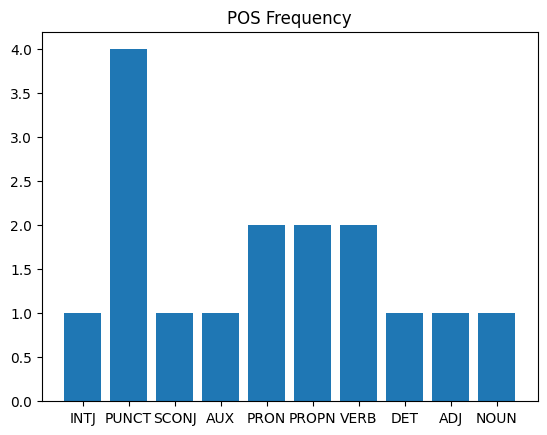

In [41]:
import matplotlib.pyplot as plt

plt.bar(pos_counts.keys(), pos_counts.values())
plt.title("POS Frequency")
plt.show()
